In [82]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

vars_to_use = ['econ_gradient', 'I_perc',
       'R_perc', 'H_perc', 'ICU_utilization',
        "t",'death_prob','contacts_received','contacts_given',
              'infections_given','infections_received','deaths_given','deaths_received','deaths_econ_given',
            'deaths_econ_received','xi+cost_death']
tree_depth = 4

In [83]:
data = pd.read_csv("dataset.csv")
features_ratio = ['deaths_econ_given',
            'deaths_econ_received'
]
features_ratio_names = ['ratio_'+f for f in features_ratio]

for f in features_ratio:
    data['ratio_'+f] = (data['econ_gradient']/data[f]).fillna(-1)

data = data[data['act']=='work']
# data = data[data['ag']=='age_group_50_59']

print(data.columns)
print(len(data))



Index(['Unnamed: 0', 'act', 'ag', 'lockdown', 'econ_gradient', 'I_perc',
       'R_perc', 'H_perc', 'ICU_utilization', 'xi+cost_death',
       'contacts_received', 'contacts_received(deaths)', 'infections_received',
       'deaths_received', 'deaths_econ_received', 'contacts_given',
       'contacts_given(deaths)', 'infections_given', 'deaths_given',
       'deaths_econ_given', 'death_prob', 't', 'ratio_deaths_econ_given',
       'ratio_deaths_econ_received'],
      dtype='object')
38880


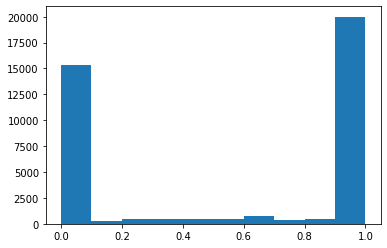

In [84]:
plt.hist(data['lockdown'], bins = 10)
plt.show()

In [85]:
data['objective'] = ['high' if v>0.5 else 'low' for v in data['lockdown']]

In [86]:
clf = tree.DecisionTreeRegressor(max_depth=tree_depth,criterion='mse')
clf = clf.fit(data[vars_to_use+features_ratio_names], data["lockdown"])


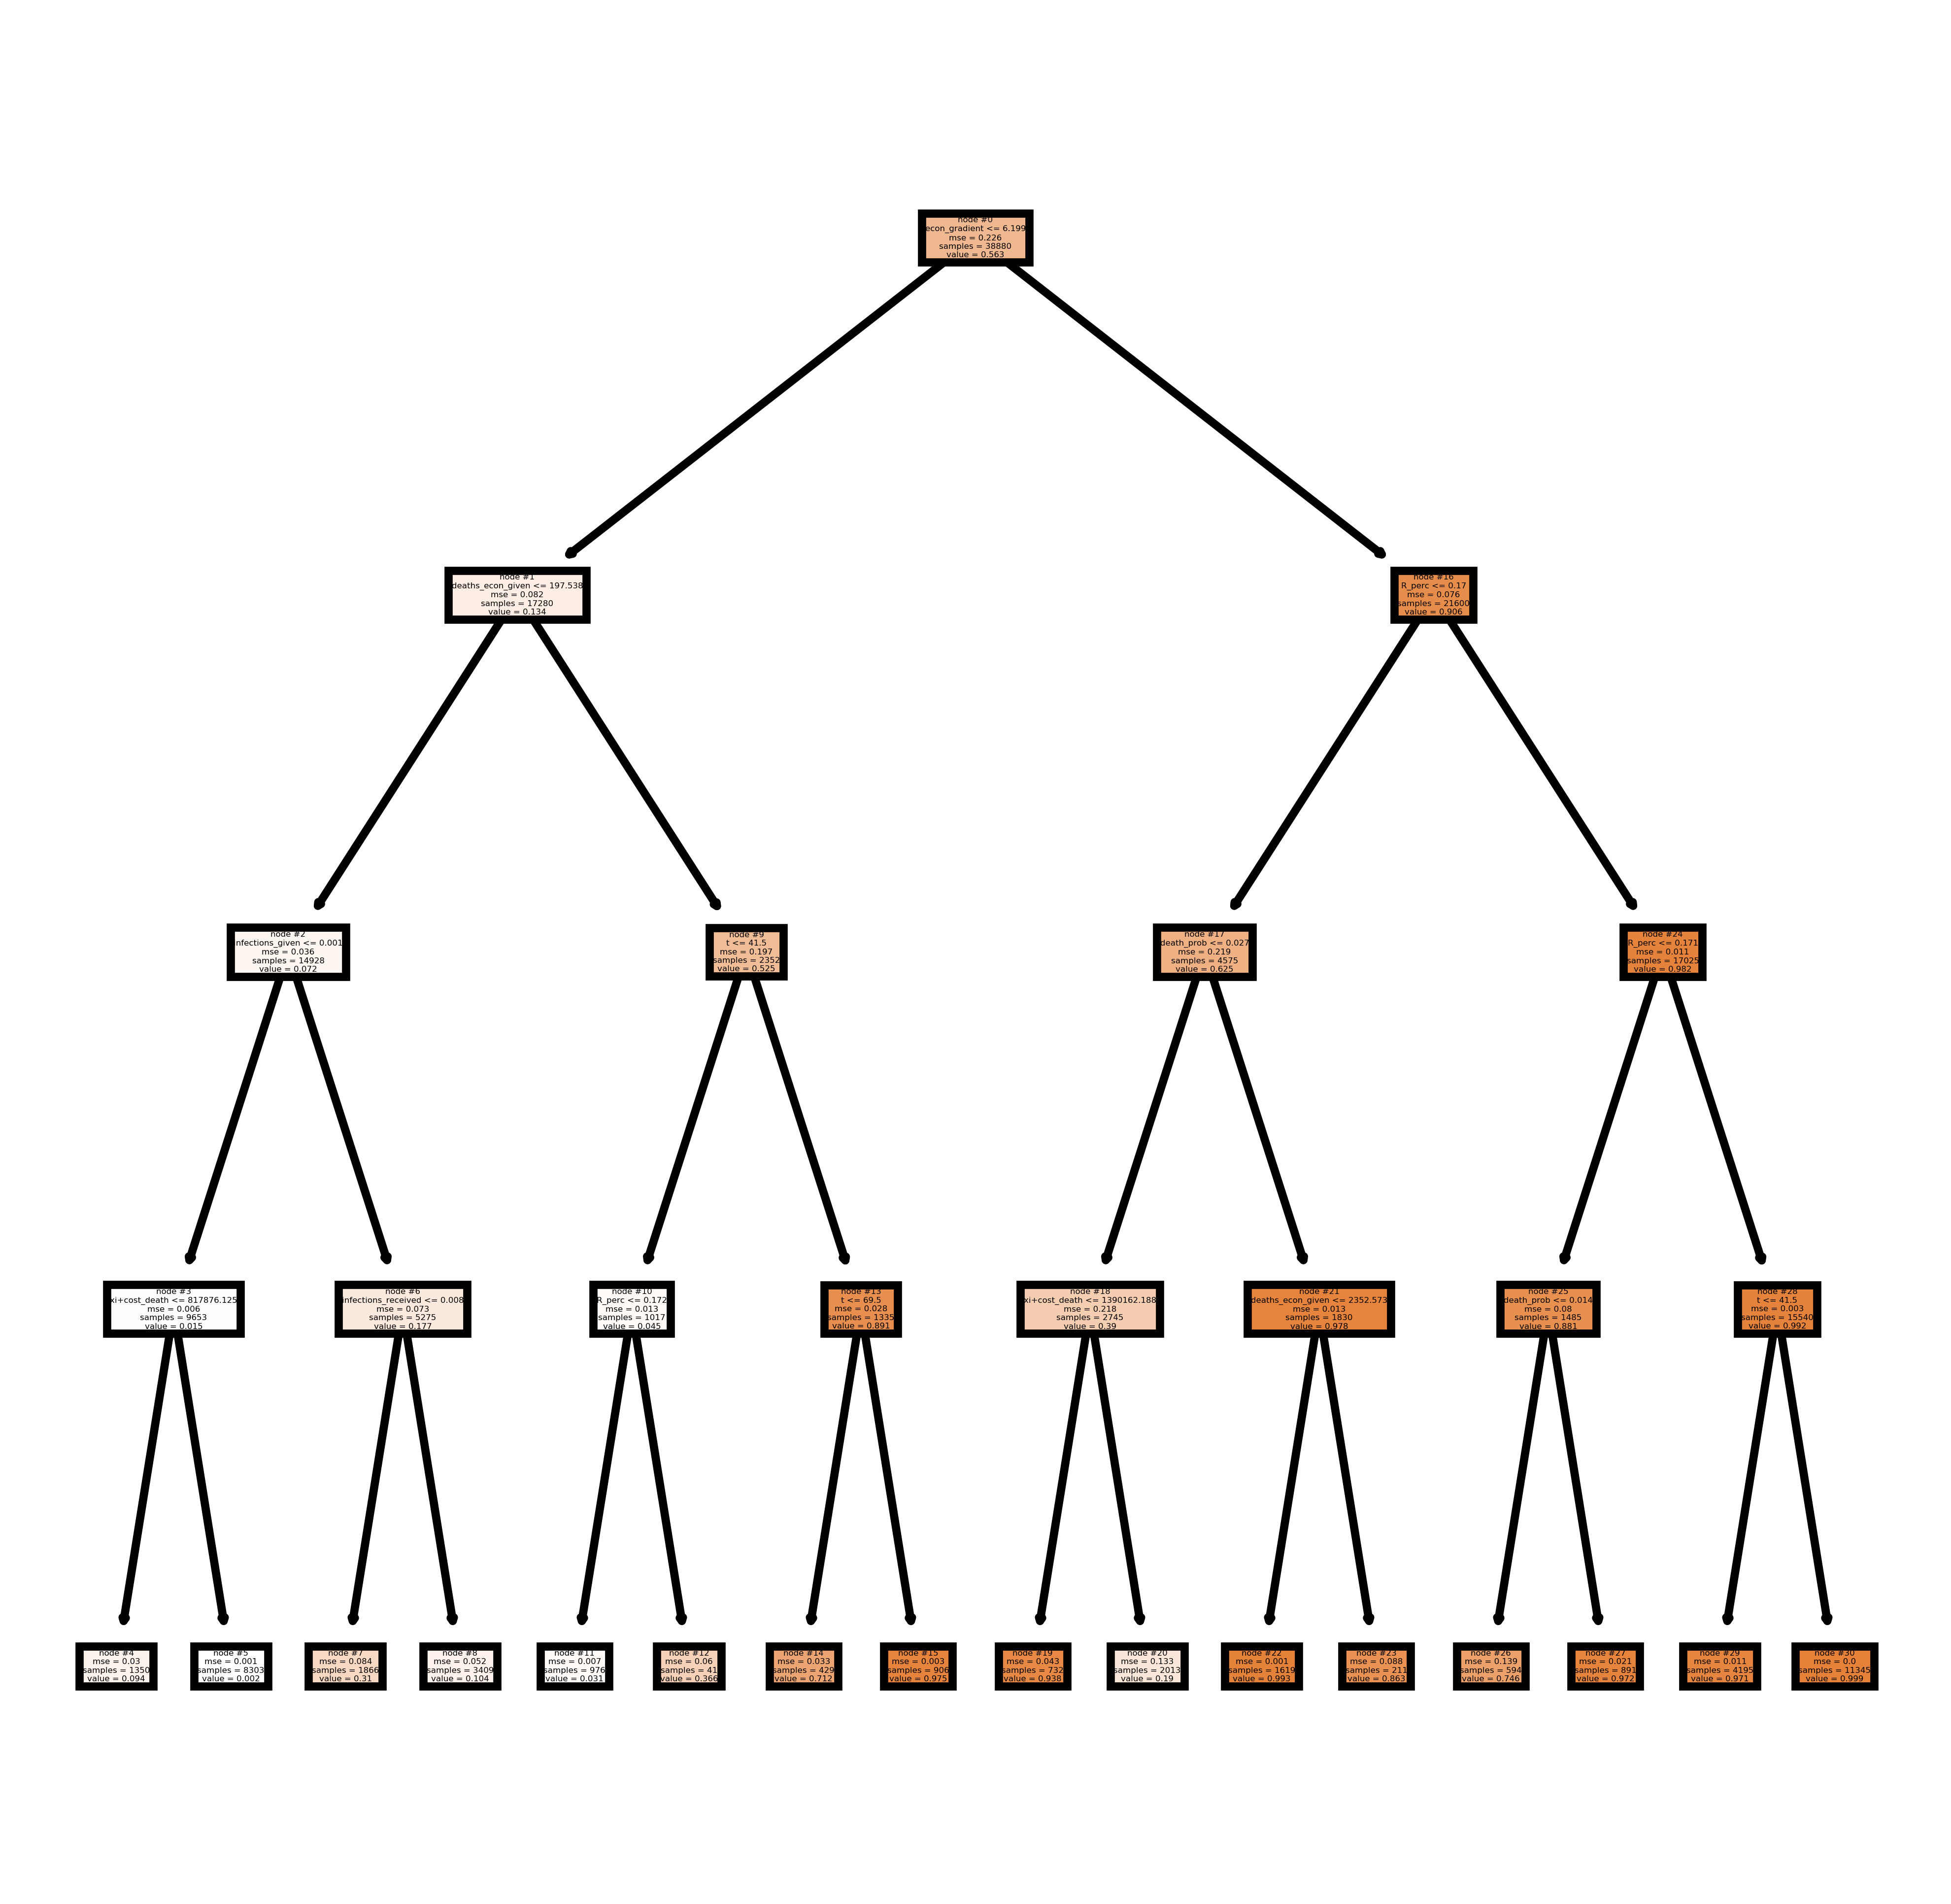

In [76]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1200)
tree.plot_tree(clf, feature_names=vars_to_use+features_ratio_names, filled=True, node_ids=True) 
fig.savefig('tree.png')